#MNIST Handwritten Digit Clasification using Deep Learning (Neural Network)**

Importing the Dependencies

In [64]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix

Loading the MNIST data from keras.datasets

In [65]:
(X_train, Y_train), (X_test, Y_test) =  mnist.load_data()

In [66]:
type(X_train)

numpy.ndarray

In [67]:
# shape of the numpy arrays
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


Training data = 60,000 Images

Test data = 10,000 Images

Image dimension  --> 28 x 28

Grayscale Image  --> 1 channel

In [68]:
# printing the 10th image

print(X_train[10])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  42 118 219 166 118 118   6
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 103 242 254 254 254 254 254  66
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  18 232 254 254 254 254 254 238
   70   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 104 244 254 224 254 254 254
  141   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 207 254 210 25

In [69]:
print(X_train[10].shape)

(28, 28)


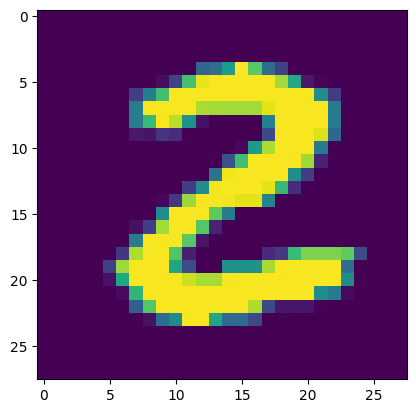

2


In [70]:
# displaying the image

plt.imshow(X_train[25])
plt.show()

# print the corresponding label
print(Y_train[25])

Image Lables

In [71]:
print(Y_train.shape, Y_test.shape)

(60000,) (10000,)


In [72]:
# unique values in Y_train
print(np.unique(Y_train))

# unique values in Y_test
print(np.unique(Y_test))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


We can use these labels as such or we can also apply One Hot Encoding

All the images have the same dimensions in this dataset, If not, we have to resize all the images to a common dimension

In [73]:
# scaling the values

X_train = X_train/255
X_test = X_test/255

In [74]:
# printing the 10th image

print(X_train[10])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

Building the Neural Network

In [75]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'), # Increased units
    keras.layers.Dropout(0.2),                   # Prevents overfitting
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(10, activation='softmax') # Softmax for multi-class
])



/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [76]:
# compiling the Neural Network

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])



In [77]:
# training the Neural Network

# Using a validation split helps monitor if the model is over-learning the training data
model.fit(X_train, Y_train, epochs=10, validation_split=0.1)

Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8508 - loss: 0.5021 - val_accuracy: 0.9642 - val_loss: 0.1282
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9517 - loss: 0.1604 - val_accuracy: 0.9748 - val_loss: 0.0919
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9646 - loss: 0.1141 - val_accuracy: 0.9763 - val_loss: 0.0835
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9699 - loss: 0.0943 - val_accuracy: 0.9760 - val_loss: 0.0831
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9735 - loss: 0.0821 - val_accuracy: 0.9778 - val_loss: 0.0786
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9772 - loss: 0.0730 - val_accuracy: 0.9772 - val_loss: 0.0803
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9785 - loss: 0.0655 - val_accuracy: 0.9775 - val_loss: 0.0792
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9810 - loss: 0.0575 - 

Training data accuracy = 98.9%

**Accuracy on Test data:**

In [78]:
loss, accuracy = model.evaluate(X_test, Y_test)
print(accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9744 - loss: 0.0859
0.9783999919891357


Test data accuracy = 97.1%

In [79]:
print(X_test.shape)

(10000, 28, 28)


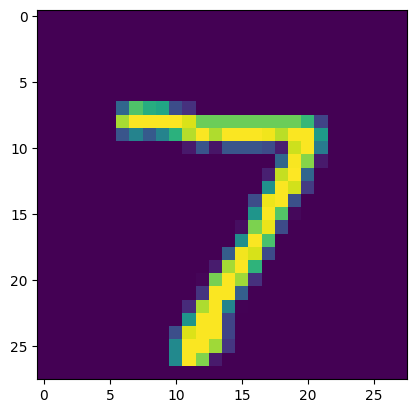

In [80]:
# first data point in X_test
plt.imshow(X_test[0])
plt.show()

In [81]:
print(Y_test[0])

7


In [82]:
Y_pred = model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 980us/step


In [83]:
print(Y_pred.shape)

(10000, 10)


In [84]:
print(Y_pred[0])

[1.07114025e-14 1.69800263e-08 2.34754293e-06 8.34925158e-04
 2.89250782e-15 6.20078211e-09 5.25770787e-17 9.99162674e-01
 4.63107108e-09 2.48095393e-08]


model.predict() gives the prediction probability of each class for that data point

In [85]:
# converting the prediction probabilities to class label

label_for_first_test_image = np.argmax(Y_pred[0])
print(label_for_first_test_image)

7


In [86]:
# converting the prediction probabilities to class label for all test data points
Y_pred_labels = [np.argmax(i) for i in Y_pred]
print(Y_pred_labels)

[np.int64(7), np.int64(2), np.int64(1), np.int64(0), np.int64(4), np.int64(1), np.int64(4), np.int64(9), np.int64(5), np.int64(9), np.int64(0), np.int64(6), np.int64(9), np.int64(0), np.int64(1), np.int64(5), np.int64(9), np.int64(7), np.int64(3), np.int64(4), np.int64(9), np.int64(6), np.int64(6), np.int64(5), np.int64(4), np.int64(0), np.int64(7), np.int64(4), np.int64(0), np.int64(1), np.int64(3), np.int64(1), np.int64(3), np.int64(4), np.int64(7), np.int64(2), np.int64(7), np.int64(1), np.int64(2), np.int64(1), np.int64(1), np.int64(7), np.int64(4), np.int64(2), np.int64(3), np.int64(5), np.int64(1), np.int64(2), np.int64(4), np.int64(4), np.int64(6), np.int64(3), np.int64(5), np.int64(5), np.int64(6), np.int64(0), np.int64(4), np.int64(1), np.int64(9), np.int64(5), np.int64(7), np.int64(8), np.int64(9), np.int64(3), np.int64(7), np.int64(4), np.int64(6), np.int64(4), np.int64(3), np.int64(0), np.int64(7), np.int64(0), np.int64(2), np.int64(9), np.int64(1), np.int64(7), np.int64(3)

Y_test  -->  True labels

Y_pred_labels  -->  Predicted Labels

Confusin Matrix

In [87]:
conf_mat = confusion_matrix(Y_test, Y_pred_labels)

In [88]:
print(conf_mat)

tf.Tensor(
[[ 966    1    1    1    0    2    3    2    3    1]
 [   0 1126    3    0    0    0    2    0    4    0]
 [   0    0 1014    2    0    0    1    5    9    1]
 [   2    0    6  984    0    6    0    6    4    2]
 [   0    1    8    0  950    0    5    4    1   13]
 [   2    0    0    7    0  873    5    1    2    2]
 [   6    2    1    1    1    5  939    0    3    0]
 [   1    5    6    1    0    0    0 1013    1    1]
 [   4    0    2    8    3    6    1    5  942    3]
 [   0    2    0   10    9    3    0    7    1  977]], shape=(10, 10), dtype=int32)


Text(0.5, 47.7222222222222, 'Predicted Labels')

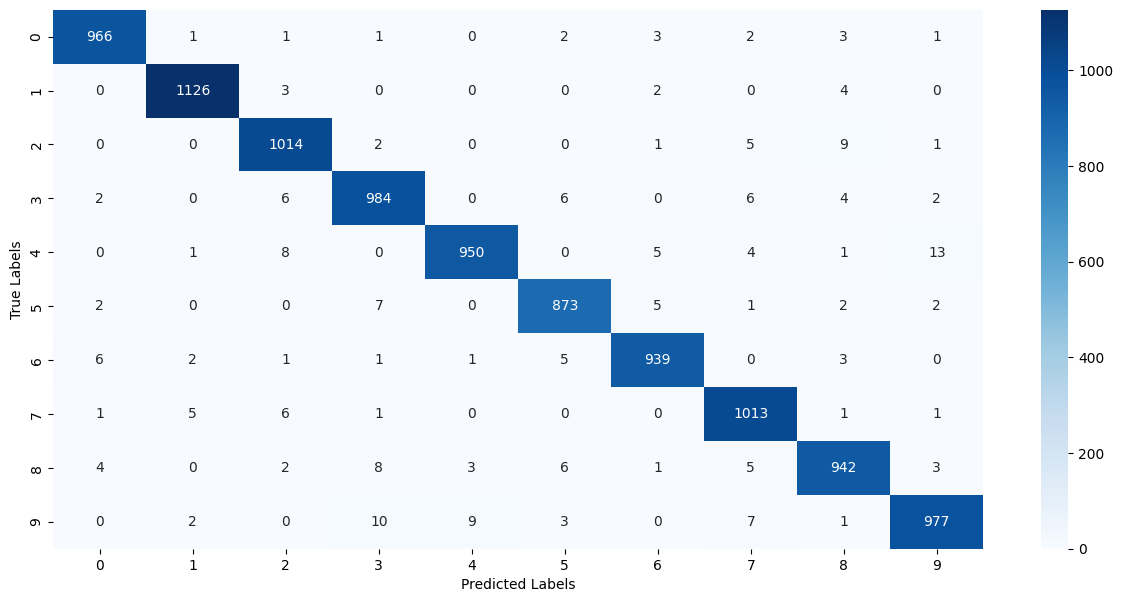

In [89]:
plt.figure(figsize=(15,7))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')

Building a Predictive System

Prediction image link: https://camo.githubusercontent.com/3d9666a8f0c5658667292b74ca19295827c2b22a0e903db283998ae213e6f6e1/68747470733a2f2f646174616d61646e6573732e6769746875622e696f2f6173736574732f696d616765732f74665f66696c655f666565642f4d4e4953545f64696769742e706e67

In [90]:
input_image_path = '/content/drive/MyDrive/Colab Notebooks/MachineLearningCourseWithPython/data/MNIST_digit.png'

input_image = cv2.imread(input_image_path)

In [91]:
type(input_image)

numpy.ndarray

In [92]:
print(input_image)

[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]


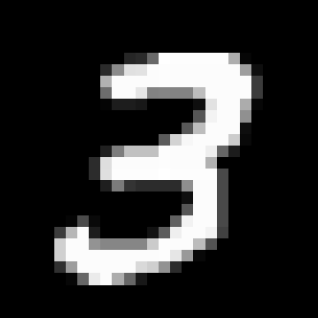

In [93]:
cv2_imshow(input_image)

In [94]:
input_image.shape

(318, 318, 3)

In [95]:
grayscale = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)

In [96]:
grayscale.shape

(318, 318)

In [97]:
input_image_resize = cv2.resize(grayscale, (28, 28))

In [98]:
input_image_resize.shape

(28, 28)

In [99]:
cv2_imshow(input_image_resize)

In [100]:
input_image_resize = input_image_resize/255

In [101]:
type(input_image_resize)

numpy.ndarray

In [102]:
image_reshaped = np.reshape(input_image_resize, [1,28,28])

In [103]:
input_prediction = model.predict(image_reshaped)
print(input_prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
[[1.3635040e-24 4.2836492e-19 2.3448625e-14 1.0000000e+00 1.0401415e-29
  1.0944338e-14 1.1852574e-30 6.8089575e-16 1.6640628e-15 2.5438902e-12]]


In [104]:
input_pred_label = np.argmax(input_prediction)

In [105]:
print(input_pred_label)

3


**Predictive System**

Path of the image to be predicted: /content/drive/MyDrive/Colab Notebooks/MachineLearningCourseWithPython/data/MNIST_digit.png


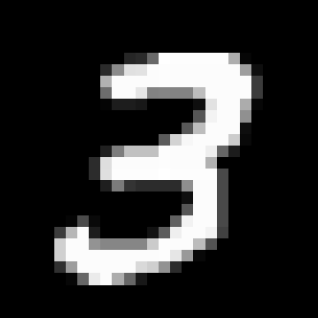

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
The Handwritten Digit is recognised as  3


In [107]:
import urllib.request
import numpy as np

input_image_path = input('Path of the image to be predicted: ')

# Check if the input path is a URL or a local file path
if input_image_path.startswith('http'):
    # Read image from URL with a User-Agent header
    req = urllib.request.Request(input_image_path, headers={'User-Agent': 'Mozilla/5.0'})
    resp = urllib.request.urlopen(req)
    image_array = np.asarray(bytearray(resp.read()), dtype=np.uint8)
    input_image = cv2.imdecode(image_array, cv2.IMREAD_COLOR)
else:
    # Read image from local file path
    input_image = cv2.imread(input_image_path)

# Check if the image was loaded successfully
if input_image is None:
    print(f"Error: Could not load image from {input_image_path}")
else:
    cv2_imshow(input_image)

    # grayscale = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)
    grayscale = cv2.cvtColor(input_image, cv2.COLOR_BGR2GRAY)

    input_image_resize = cv2.resize(grayscale, (28, 28))

    input_image_resize = input_image_resize/255

    image_reshaped = np.reshape(input_image_resize, [1,28,28])

    input_prediction = model.predict(image_reshaped)

    input_pred_label = np.argmax(input_prediction)

    print('The Handwritten Digit is recognised as ', input_pred_label)


#Automated Check Digitizer  (USE CASE)

In [108]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
from google.colab.patches import cv2_imshow # For Colab users

# Load and Preprocess Data
(X_train, Y_train), (X_test, Y_test) = keras.datasets.mnist.load_data()
X_train = X_train / 255.0
X_test = X_test / 255.0

# Build an improved model
model = keras.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, Y_train, epochs=10, batch_size=32, verbose=1)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8517 - loss: 0.4888
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9561 - loss: 0.1444
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9664 - loss: 0.1062
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9717 - loss: 0.0897
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9746 - loss: 0.0777
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9785 - loss: 0.0661
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9795 - loss: 0.0632
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9812 - loss: 0.0568
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9833 - loss: 0.0499
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9835 - loss: 0.0502


In [109]:
def predict_check_with_decimal(image_path):
    # 1. Load and Pre-process
    image = cv2.imread(image_path)
    if image is None: return "Error: Image not found"

    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)
    # Thresholding to get white text on black background
    _, thresh = cv2.threshold(blurred, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

    # 2. Find and Sort Contours (Left to Right)
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    contours = sorted(contours, key=lambda ctr: cv2.boundingRect(ctr)[0])

    final_result = []

    # Calculate average height to distinguish dots from digits
    heights = [cv2.boundingRect(c)[3] for c in contours]
    avg_height = np.mean(heights) if heights else 0

    for ctr in contours:
        x, y, w, h = cv2.boundingRect(ctr)

        # LOGIC: If the object is very small or significantly shorter than average
        if h < (0.4 * avg_height):
            # Likely a decimal point or noise
            if w > 2 and h > 2: # Filter out microscopic noise
                final_result.append(".")
                cv2.rectangle(image, (x, y), (x+w, y+h), (255, 0, 0), 2) # Blue box for dot
            continue

        # LOGIC: Normal Digit Extraction
        if w > 5 and h > 10:
            roi = thresh[y:y+h, x:x+w]

            # Pad and Resize
            padded = cv2.copyMakeBorder(roi, 10, 10, 10, 10, cv2.BORDER_CONSTANT, value=0)
            final_digit = cv2.resize(padded, (28, 28))

            # Predict
            normalized = final_digit / 255.0
            prediction = model.predict(normalized.reshape(1, 28, 28), verbose=0)
            final_result.append(str(np.argmax(prediction)))

            cv2.rectangle(image, (x, y), (x+w, y+h), (0, 255, 0), 2) # Green box for digit

    # Format the output string
    prediction_string = "".join(final_result)

    # Display Result
    cv2_imshow(image)
    print(f"Final Recognized Value: ${prediction_string}")



Dummy image 'test_check.png' created!


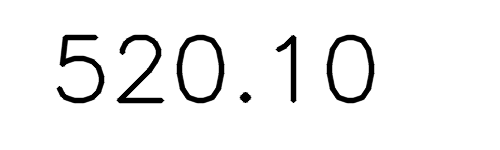

In [112]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

# Create a white canvas (150 pixels high, 500 pixels wide)
dummy_check = np.ones((150, 500, 3), dtype=np.uint8) * 255

# Define font and text
text = "520.10"
font = cv2.FONT_HERSHEY_SCRIPT_SIMPLEX # Use a cursive-style font for handwritten feel
font_scale = 3
color = (0, 0, 0) # Black ink
thickness = 4

# Put text on image
cv2.putText(dummy_check, text, (50, 100), font, font_scale, color, thickness, cv2.LINE_AA)

# Save the image
cv2.imwrite('test_check.png', dummy_check)

print("Dummy image 'test_check.png' created!")
cv2_imshow(dummy_check)

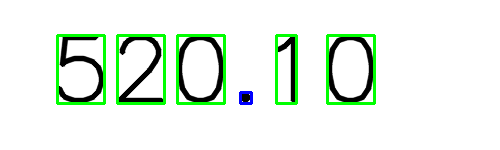

Final Recognized Value: $520.20


In [113]:
# Use the function
predict_check_with_decimal('test_check.png')

In [114]:
# Save the entire model (architecture, weights, and optimizer state)
model.save('digit_digitizer_model.keras')

print("Model saved successfully as 'digit_digitizer_model.keras'")

Model saved successfully as 'digit_digitizer_model.keras'


------------------------------
PREDICTED AMOUNT: $520.20
------------------------------


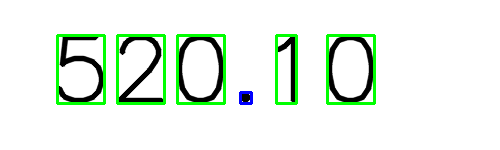

In [116]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from google.colab.patches import cv2_imshow # Specific for Google Colab

def automated_check_scanner(image_path, model_path):
    """
    Full pipeline: Loads a trained MNIST model, segments an image of a check amount,
    identifies digits and decimal points, and returns the final string.
    """

    # 1. Load the Intelligence
    try:
        model = load_model(model_path)
    except Exception as e:
        return f"Error loading model: {e}"

    # 2. Load and Pre-process the Check Image
    image = cv2.imread(image_path)
    if image is None:
        return "Error: Image not found."

    # Convert to grayscale and blur to remove "paper texture" noise
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)

    # Thresholding: Creates a binary (Black & White) image
    # Note: cv2.THRESH_BINARY_INV turns black ink on white paper into white ink on black background
    _, thresh = cv2.threshold(blurred, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

    # 3. Find Contours (Detecting the "blobs" of ink)
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Sort contours from Left to Right (essential for reading numbers in order)
    contours = sorted(contours, key=lambda ctr: cv2.boundingRect(ctr)[0])

    # Calculate average height to distinguish digits from decimal points
    heights = [cv2.boundingRect(c)[3] for c in contours]
    avg_height = np.mean(heights) if heights else 0

    final_result = []

    # 4. Loop through each detected object
    for ctr in contours:
        x, y, w, h = cv2.boundingRect(ctr)

        # Logic A: Identify Decimal Points (Small objects)
        if h < (0.4 * avg_height):
            if w > 2 and h > 2: # Basic noise filter
                final_result.append(".")
                cv2.rectangle(image, (x, y), (x + w, y + h), (255, 0, 0), 2) # Blue box
            continue

        # Logic B: Identify Digits (Normal sized objects)
        if w > 5 and h > 15:
            # Extract the digit
            roi = thresh[y:y+h, x:x+w]

            # Pad the digit (MNIST model expects centered digits with space around them)
            padded = cv2.copyMakeBorder(roi, 10, 10, 10, 10, cv2.BORDER_CONSTANT, value=0)
            final_digit = cv2.resize(padded, (28, 28))

            # Prepare for prediction (Normalize and Reshape)
            final_digit = final_digit / 255.0
            final_digit = final_digit.reshape(1, 28, 28)

            # Predict using the loaded model
            prediction = model.predict(final_digit, verbose=0)
            digit_label = np.argmax(prediction)

            final_result.append(str(digit_label))

            # Draw visual feedback
            cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2) # Green box

    # 5. Output Results
    final_amount = "".join(final_result)
    print("-" * 30)
    print(f"PREDICTED AMOUNT: ${final_amount}")
    print("-" * 30)
    cv2_imshow(image)

# --- HOW TO RUN ---
# 1. Save your model: model.save('my_model.keras')
# 2. Run the scanner:
automated_check_scanner('test_check.png', '/content/digit_digitizer_model.keras')